In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Birdsals Method for Initialization

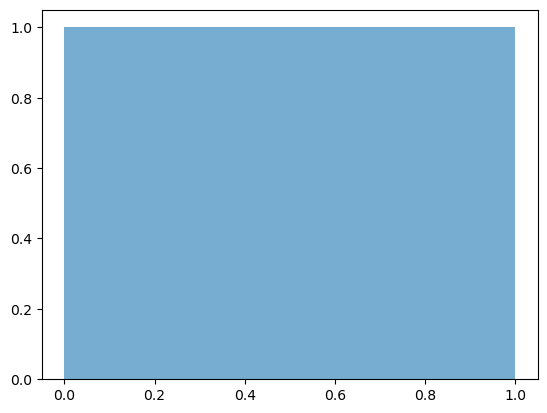

In [ ]:
p_count = 1000

positions = np.linspace(0, 1, p_count)

for x_0 in positions:
    x_0 += 0.001 * np.cos(2 * np.pi * x_0)

plt.figure()
plt.hist(positions, bins=50, density=True, alpha=0.6, label="Sampled Distribution")
plt.show()

# Trying different PDF's for an initial condition

## $\sin(\pi x)$

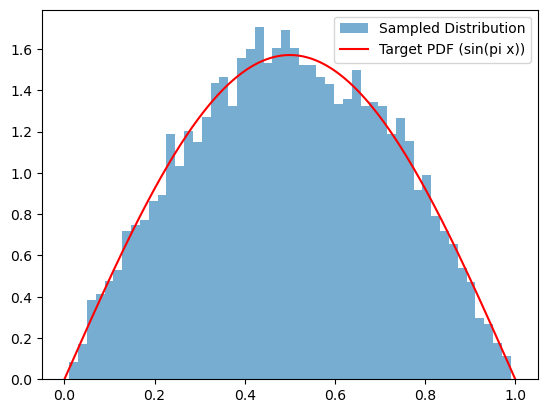

In [37]:
num_samples = 10000

def inverse_cdf(u):
    return np.arccos(1 - 2 * u) / np.pi

u_samples = np.random.uniform(0, 1, num_samples)
samples = inverse_cdf(u_samples)

x = np.linspace(0, 1, 1000)
pdf = np.pi / 2 * np.sin(np.pi * x)  # Target PDF (not normalized since range is [0, 1])
plt.hist(samples, bins=50, density=True, alpha=0.6, label="Sampled Distribution")
plt.plot(x, pdf, label="Target PDF (sin(pi x))", color="red")
plt.legend()
plt.show()

# $\cos(\pi x ) + 1$

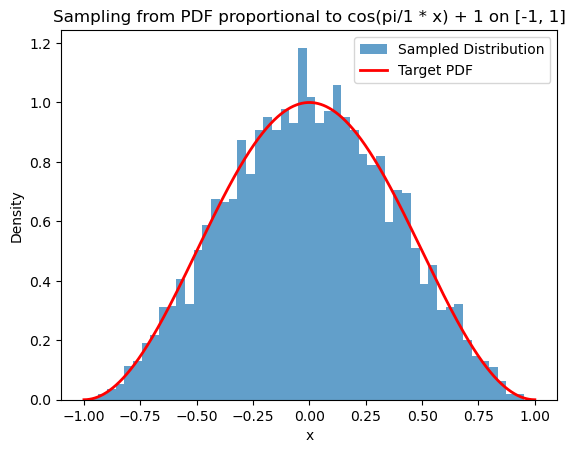

In [ ]:
def sample_cos_pdf(a, num_samples):
    samples = []
    max_pdf = 2
    while len(samples) < num_samples:
        x_candidate = np.random.uniform(-a, a)
        # Compute the PDF value at the candidate sample
        pdf_value = (np.cos(np.pi * x_candidate / a) + 1) / (2 * a)
        # Draw a uniform random number to decide acceptance
        u = np.random.uniform(0, max_pdf / (2 * a))

        if u <= pdf_value:
            samples.append(x_candidate)

    return np.array(samples)

# Parameters
a = 1  # Change as needed
num_samples = 5000

# Sample from the PDF
samples = sample_cos_pdf(a, num_samples)

# Plot the results
x = np.linspace(-a, a, 1000)
pdf = (np.cos(np.pi * x / a) + 1) / (2 * a)

plt.hist(samples, bins=50, density=True, alpha=0.7, label='Sampled Distribution')
plt.plot(x, pdf, label='Target PDF', color='red', linewidth=2)
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.title(f"Sampling from PDF proportional to cos(pi/{a} * x) + 1 on [-{a}, {a}]")
plt.show()


# Initial Conditions

2560


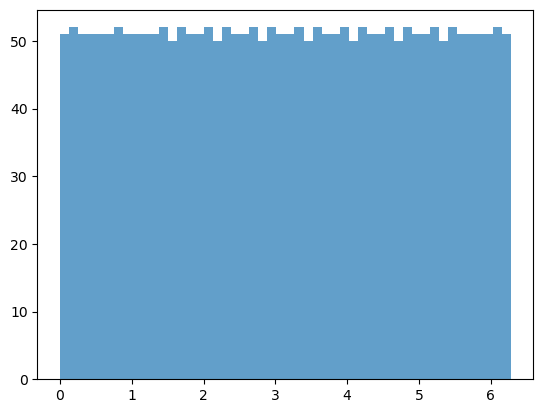

In [ ]:
data = pd.read_csv("perturbation_init_out_rays_0001.csv")
print(len(data["x"]))
plt.figure()
# plt.plot(data["x"], np.ones_like(data["x"]), "o")

plt.hist(data["x"], bins=50, alpha=0.7, label='Sampled Distribution')
plt.show()

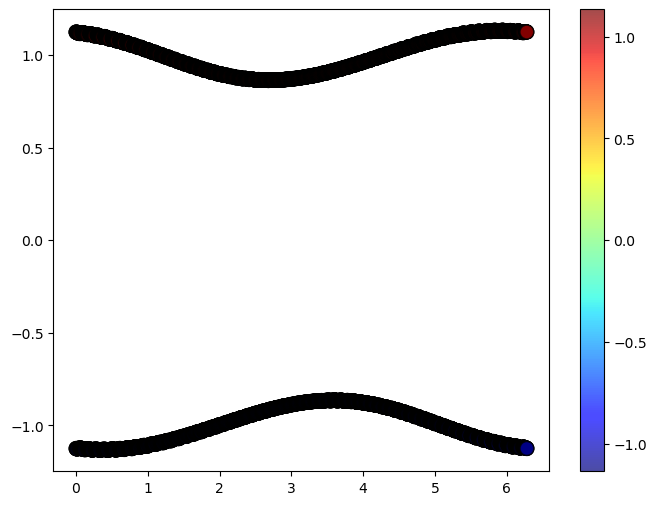

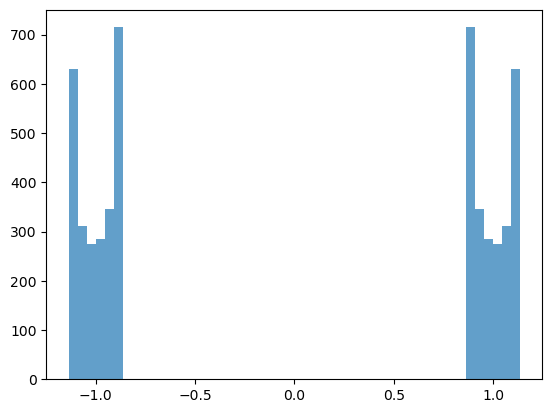

In [16]:
# particles = pd.read_csv("two-steram_particle_data_ray_data_0001.csv")
particles = pd.read_csv("two-stream_out_rays_0180.csv")

# Create scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(particles['x'], particles['v_x'], c=particles['v_x'], cmap='jet', s=100, edgecolor='k', alpha=0.7)

# Add color bar to represent heatmap scale
plt.colorbar(scatter)
# plt.ylim(top=4, bottom=-4)
plt.show()
plt.figure()

plt.hist(particles['v_x'], bins=50, alpha=0.7)
plt.show()

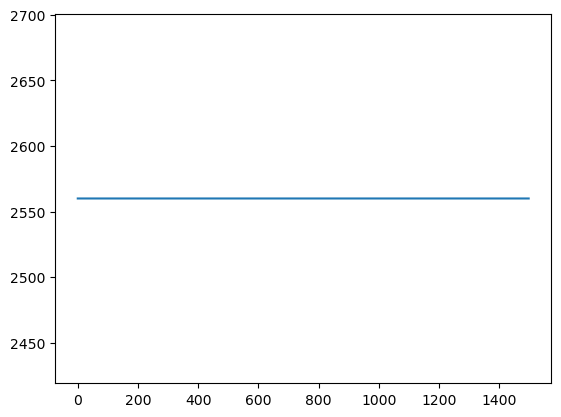

In [ ]:
csv_files = [f"perturbation_init_out_rays_{i:04d}.csv" for i in range(1, 1500, 1)]


population = []

for file in (csv_files):
  data = pd.read_csv(file)
  population.append(len(data["x"]))


plt.figure()
plt.plot(population)
plt.show()